In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("./Data/test(in).csv", parse_dates=True)
dataset.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


# Task-1

In [3]:
!pip3 install transformers


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

In [5]:
pipe = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")  

Device set to use mps:0


In [6]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

model = model.to(device)
model.eval()
class_names = ["negative", "neutral", "positive"]

def get_sentiments(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = F.softmax(logits, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()

    if predicted_class in [0, 1]:
        return class_names[0]  # negative
    elif predicted_class == 2:
        return class_names[1]  # neutral
    else:
        return class_names[2]  # positive

Using device: mps


In [7]:
dataset["Sentiment"] = dataset["body"].apply(get_sentiments)

In [8]:
dataset.head(10)

,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,negative
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,negative
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,negative
5,RE: Favor,"sure, just call me the bank that delivers.\n \...",10/23/2011,eric.bass@enron.com,neutral
6,MG Inventory Summaries,Inventory summaries for both MGL and MGMCC as ...,4/5/2010,kayne.coulter@enron.com,positive
7,Forgot the Attachment,Please print attachment and make sure that e:m...,4/21/2010,patti.thompson@enron.com,positive
8,Garvin Brown - AXIA Sr. Power Scheduler,Please advise me of your interest in Garvin's ...,2/7/2010,sally.beck@enron.com,positive
9,More Dallas ASE Information,The start time for Tuesday morning has been ch...,2/6/2010,kayne.coulter@enron.com,neutral


# Task-2

In [10]:
dataset.info()
dataset.describe()
dataset['date'] = pd.to_datetime(dataset['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   Sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


In [11]:
dataset.head()

,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,negative
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,negative
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,negative


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/9w/csn11pg56mz_mqtbmcxzdc340000gn/T/ipykernel_492/367220082.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Sentiment', palette=custom_palette)


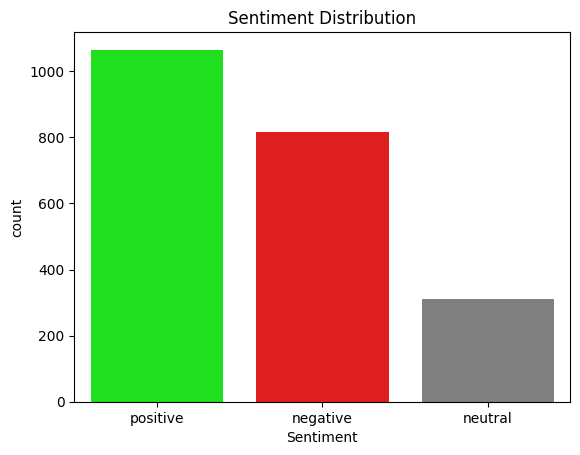

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {
    'positive': 'lime',
    'negative': 'red',
    'neutral': 'gray'
}

sns.countplot(data=dataset, x='Sentiment', palette=custom_palette)
plt.title('Sentiment Distribution')
plt.show()

/var/folders/9w/csn11pg56mz_mqtbmcxzdc340000gn/T/ipykernel_492/4123777886.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_monthly = dataset.set_index('date').groupby('Sentiment').resample('M').size().unstack()
/var/folders/9w/csn11pg56mz_mqtbmcxzdc340000gn/T/ipykernel_492/4123777886.py:1: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sentiment_monthly = dataset.set_index('date').groupby('Sentiment').resample('M').size().unstack()


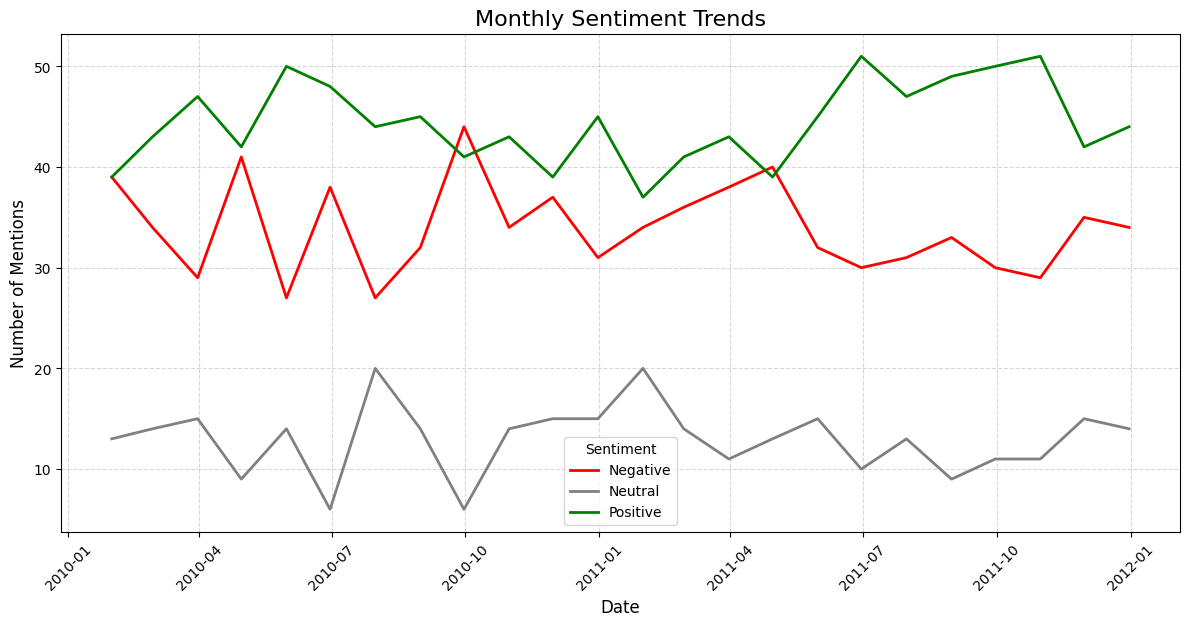

In [23]:
sentiment_monthly = dataset.set_index('date').groupby('Sentiment').resample('M').size().unstack()

plt.figure(figsize=(12, 6))
for sentiment in sentiment_monthly.index:
    color = {
        'positive': 'green',
        'negative': 'red',
        'neutral': 'gray'
    }.get(sentiment, 'black')
    plt.plot(sentiment_monthly.columns, sentiment_monthly.loc[sentiment], label=sentiment.capitalize(), color=color, linewidth=2)

# Enhancements
plt.title("Monthly Sentiment Trends", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Mentions", fontsize=12)
plt.legend(title='Sentiment')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='from'>

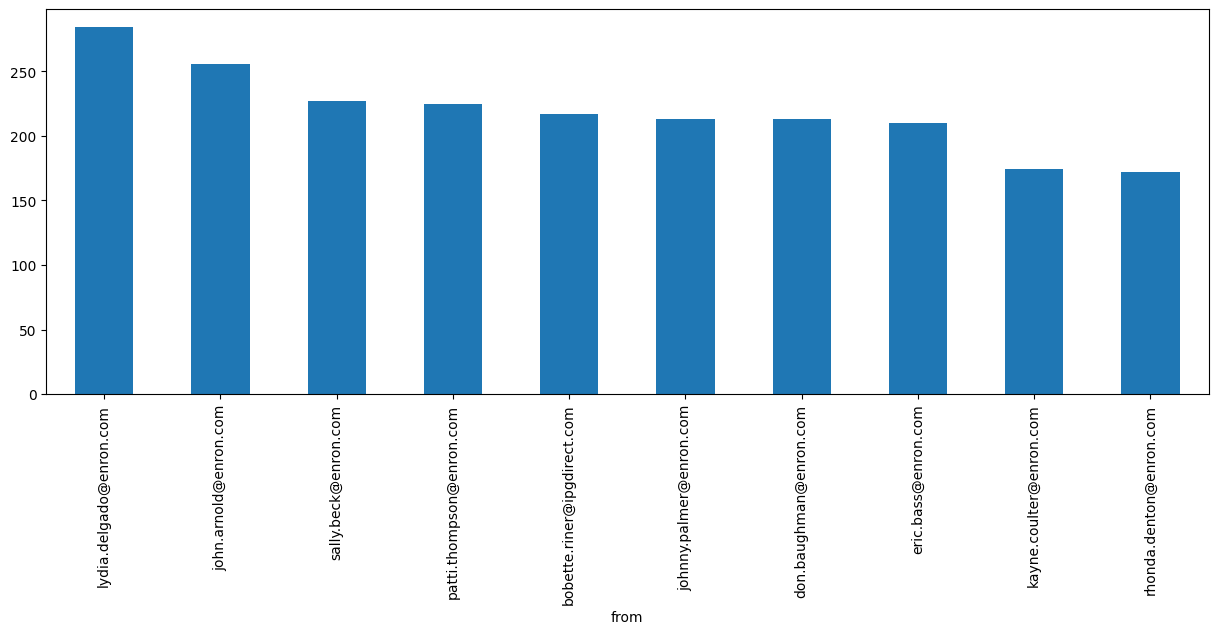

In [33]:
plt.figure(figsize=(15, 5))

dataset['from'].value_counts().head(10).plot(kind='bar')